In [81]:
import os
import numpy as np
import pandas as pd
import sklearn
from io import StringIO
import xenaPython as xena
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test
import scipy.stats as stats

In [2]:
data_path = "/data/private/pdutta/Collab_data/David_data/Serine_gene_Z_score_per_TCGA_sample.xlsx"

In [3]:
df  = pd.read_excel(data_path)
df['Unnamed: 0'] = df['Unnamed: 0'].str.replace('.','-')
df = df.set_index('Unnamed: 0')
df.index.name = None

/tmp/ipykernel_2253719/3779487040.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Unnamed: 0'] = df['Unnamed: 0'].str.replace('.','-')


In [76]:
df

,PHGDH,SFXN1,SLC1A5,Z score
TCGA-AG-3726-01,3.326811,-0.021047,2.016050,1.773938
TCGA-AG-3727-01,3.135933,-0.515977,1.599620,1.406525
TCGA-CK-4952-01,2.388606,0.592290,1.103608,1.361501
TCGA-CL-4957-01,2.442352,0.751154,0.889201,1.360902
TCGA-EF-5830-01,3.142027,-0.400663,1.274505,1.338623
...,...,...,...,...
TCGA-AA-A01Q-01,-4.042396,-0.192062,-0.773237,-1.669232
TCGA-AG-3732-01,-2.953977,-1.504648,-0.742928,-1.733851
TCGA-AG-3725-01,-3.759599,-1.165187,-0.406955,-1.777247
TCGA-G4-6320-01,-4.529502,-0.364425,-0.486842,-1.793589


In [77]:
df['mean'] = df.mean(axis=1)

In [78]:
df

,PHGDH,SFXN1,SLC1A5,Z score,mean
TCGA-AG-3726-01,3.326811,-0.021047,2.016050,1.773938,1.773938
TCGA-AG-3727-01,3.135933,-0.515977,1.599620,1.406525,1.406525
TCGA-CK-4952-01,2.388606,0.592290,1.103608,1.361501,1.361501
TCGA-CL-4957-01,2.442352,0.751154,0.889201,1.360902,1.360902
TCGA-EF-5830-01,3.142027,-0.400663,1.274505,1.338623,1.338623
...,...,...,...,...,...
TCGA-AA-A01Q-01,-4.042396,-0.192062,-0.773237,-1.669232,-1.669232
TCGA-AG-3732-01,-2.953977,-1.504648,-0.742928,-1.733851,-1.733851
TCGA-AG-3725-01,-3.759599,-1.165187,-0.406955,-1.777247,-1.777247
TCGA-G4-6320-01,-4.529502,-0.364425,-0.486842,-1.793589,-1.793589


In [86]:
df['z_score_new'] = (df['mean']-df['mean'].mean())/df['mean'].std()

In [87]:
df

,PHGDH,SFXN1,SLC1A5,Z score,mean,z_score_new
TCGA-AG-3726-01,3.326811,-0.021047,2.016050,1.773938,1.773938,2.735433
TCGA-AG-3727-01,3.135933,-0.515977,1.599620,1.406525,1.406525,2.173670
TCGA-CK-4952-01,2.388606,0.592290,1.103608,1.361501,1.361501,2.104830
TCGA-CL-4957-01,2.442352,0.751154,0.889201,1.360902,1.360902,2.103913
TCGA-EF-5830-01,3.142027,-0.400663,1.274505,1.338623,1.338623,2.069849
...,...,...,...,...,...,...
TCGA-AA-A01Q-01,-4.042396,-0.192062,-0.773237,-1.669232,-1.669232,-2.529071
TCGA-AG-3732-01,-2.953977,-1.504648,-0.742928,-1.733851,-1.733851,-2.627872
TCGA-AG-3725-01,-3.759599,-1.165187,-0.406955,-1.777247,-1.777247,-2.694223
TCGA-G4-6320-01,-4.529502,-0.364425,-0.486842,-1.793589,-1.793589,-2.719210


In [85]:
df['mean'].std()

0.6540349672665705

In [88]:
col_name = 'z_score_new'

<AxesSubplot: >

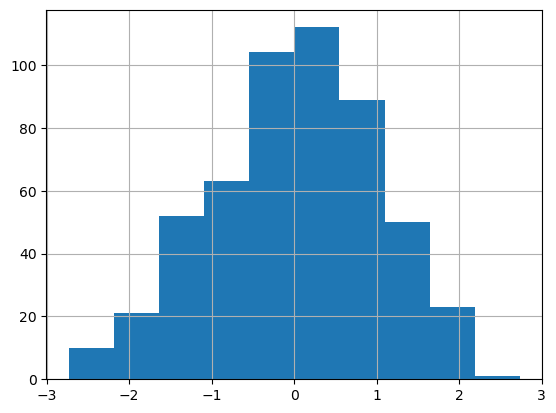

In [89]:
df[col_name].hist()

In [90]:
df[df[col_name]<-1]

,PHGDH,SFXN1,SLC1A5,Z score,mean,z_score_new
TCGA-EI-6884-01,-1.214478,-0.303918,-0.495157,-0.671184,-0.671184,-1.003086
TCGA-D5-6539-01,-1.914978,0.356280,-0.476763,-0.678487,-0.678487,-1.014252
TCGA-CK-5912-01,0.691320,-1.367148,-1.371135,-0.682321,-0.682321,-1.020114
TCGA-AG-3890-01,-1.461447,-0.472926,-0.141916,-0.692096,-0.692096,-1.035060
TCGA-AG-A015-01,-0.884747,-1.090491,-0.110399,-0.695212,-0.695212,-1.039825
...,...,...,...,...,...,...
TCGA-AA-A01Q-01,-4.042396,-0.192062,-0.773237,-1.669232,-1.669232,-2.529071
TCGA-AG-3732-01,-2.953977,-1.504648,-0.742928,-1.733851,-1.733851,-2.627872
TCGA-AG-3725-01,-3.759599,-1.165187,-0.406955,-1.777247,-1.777247,-2.694223
TCGA-G4-6320-01,-4.529502,-0.364425,-0.486842,-1.793589,-1.793589,-2.719210


In [91]:
host = xena.PUBLIC_HUBS['tcgaHub']
dataset = "survival/COADREAD_survival.txt"
samples = xena.dataset_samples (host, dataset, None)
features = xena.dataset_field(host, dataset)
print(features)
[position, [status,time]] = xena.dataset_probe_values(host, dataset, samples, ['OS','OS.time'])
df_status = pd.DataFrame(list(zip(samples, time, status)), columns = ['sample','time', 'status'])
df_status = df_status.set_index('sample')
df_status = df_status[df_status['time'] !=0]
print(df_status.shape)
df_status = df_status.replace('NaN', np.nan)
df_status = df_status.dropna()

['DFI', 'DFI.time', 'DSS', 'DSS.time', 'OS', 'OS.time', 'PFI', 'PFI.time', 'Redaction', '_PATIENT', 'sampleID']
(700, 2)


In [92]:
df_status

,time,status
sample,,
TCGA-3L-AA1B-01,475.0,0
TCGA-4N-A93T-01,146.0,0
TCGA-4T-AA8H-01,385.0,0
TCGA-5M-AAT4-01,49.0,1
TCGA-5M-AAT6-01,290.0,1
...,...,...
TCGA-G5-6233-01,556.0,1
TCGA-G5-6235-01,1696.0,0
TCGA-G5-6572-02,1432.0,1


In [93]:
df_merge = pd.merge(df, df_status, left_index=True, right_index=True)

In [94]:
df_merge

,PHGDH,SFXN1,SLC1A5,Z score,mean,z_score_new,time,status
TCGA-AG-3726-01,3.326811,-0.021047,2.016050,1.773938,1.773938,2.735433,243.0,0
TCGA-AG-3727-01,3.135933,-0.515977,1.599620,1.406525,1.406525,2.173670,30.0,0
TCGA-CK-4952-01,2.388606,0.592290,1.103608,1.361501,1.361501,2.104830,475.0,0
TCGA-CL-4957-01,2.442352,0.751154,0.889201,1.360902,1.360902,2.103913,425.0,0
TCGA-EF-5830-01,3.142027,-0.400663,1.274505,1.338623,1.338623,2.069849,106.0,0
...,...,...,...,...,...,...,...,...
TCGA-AA-A01Q-01,-4.042396,-0.192062,-0.773237,-1.669232,-1.669232,-2.529071,31.0,0
TCGA-AG-3732-01,-2.953977,-1.504648,-0.742928,-1.733851,-1.733851,-2.627872,1003.0,0
TCGA-AG-3725-01,-3.759599,-1.165187,-0.406955,-1.777247,-1.777247,-2.694223,638.0,0
TCGA-G4-6320-01,-4.529502,-0.364425,-0.486842,-1.793589,-1.793589,-2.719210,804.0,0


In [95]:
df_merge.groupby('status').size()

status
0    401
1    102
dtype: int64

In [96]:
s = df_merge[col_name]
val_list_3= s.quantile([.25, .75]).values.tolist()
val_list_2= s.quantile([.5]).values.tolist()

In [97]:
val_list_3

[-0.7133530302358584, 0.7047346930862497]

In [98]:
def group_3(row, val_list):
    if row[col_name] < val_list[0]:
        return 0
    elif val_list[0] <= row[col_name] < val_list[1]:
        return 1
    elif val_list[1] <= row[col_name]:
        return 2
def group_2(row, val_list):
    if row[col_name] < val_list[0]:
        return 0
    else:
        return 1

In [99]:
def group_3_new(row, val_list):
    if row[col_name] < -1:
        return 0
    elif -1 <= row[col_name] < 1:
        return 1
    elif 1 <= row[col_name]:
        return 2

In [100]:
df_merge['two_clusters'] = df_merge.apply(lambda row: group_2(row, val_list_2), axis=1)
df_merge['three_clusters'] = df_merge.apply(lambda row: group_3(row, val_list_3), axis=1)
df_merge['three_clusters_new'] = df_merge.apply(lambda row: group_3_new(row, val_list_3), axis=1)

In [101]:
df_merge

,PHGDH,SFXN1,SLC1A5,Z score,mean,z_score_new,time,status,two_clusters,three_clusters,three_clusters_new
TCGA-AG-3726-01,3.326811,-0.021047,2.016050,1.773938,1.773938,2.735433,243.0,0,1,2,2
TCGA-AG-3727-01,3.135933,-0.515977,1.599620,1.406525,1.406525,2.173670,30.0,0,1,2,2
TCGA-CK-4952-01,2.388606,0.592290,1.103608,1.361501,1.361501,2.104830,475.0,0,1,2,2
TCGA-CL-4957-01,2.442352,0.751154,0.889201,1.360902,1.360902,2.103913,425.0,0,1,2,2
TCGA-EF-5830-01,3.142027,-0.400663,1.274505,1.338623,1.338623,2.069849,106.0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AA-A01Q-01,-4.042396,-0.192062,-0.773237,-1.669232,-1.669232,-2.529071,31.0,0,0,0,0
TCGA-AG-3732-01,-2.953977,-1.504648,-0.742928,-1.733851,-1.733851,-2.627872,1003.0,0,0,0,0
TCGA-AG-3725-01,-3.759599,-1.165187,-0.406955,-1.777247,-1.777247,-2.694223,638.0,0,0,0,0
TCGA-G4-6320-01,-4.529502,-0.364425,-0.486842,-1.793589,-1.793589,-2.719210,804.0,0,0,0,0


In [102]:
df_merge.groupby('three_clusters').size()

three_clusters
0    126
1    251
2    126
dtype: int64

In [103]:
df_merge.groupby('three_clusters_new').size()

three_clusters_new
0     89
1    333
2     81
dtype: int64

Text(0.5, 1.0, 'KM Plot for cluster number =3\n[pvalue: 0.5250494435331579]')

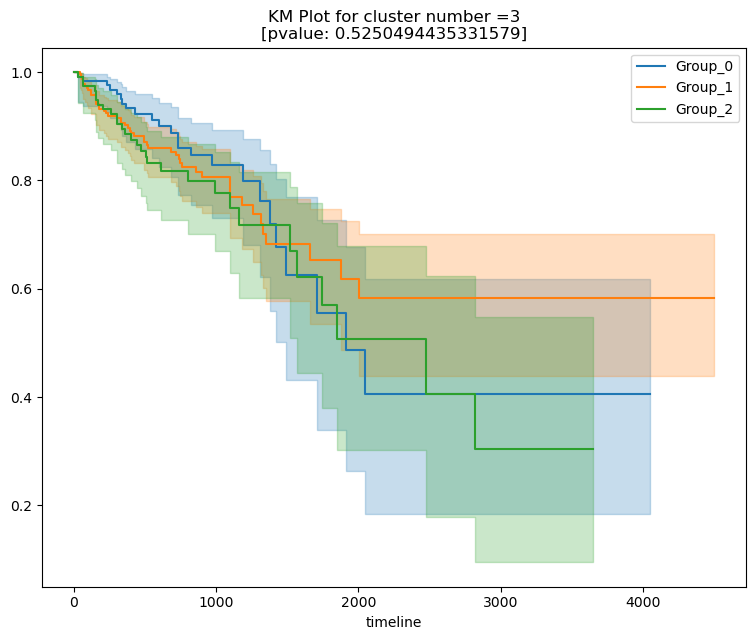

In [104]:
plt.figure(figsize=(20,7))
kmf = KaplanMeierFitter()
k=3
ax = plt.subplot(1, 2, k - 1)
for i in range(k):
    col_name = 'three_clusters'
    T =  df_merge[df_merge[col_name]==i]['time'].to_list()
    E =  df_merge[ df_merge[col_name]==i]['status'].to_list()
    kmf.fit(T, E, label="Group_"+str(i))
    ax = kmf.plot_survival_function(ax=ax)
result = multivariate_logrank_test(df_merge['time'], df_merge[col_name], df_merge['status'])
# #print("##",result.test_statistic)
# print(k,result.p_value)
#print("IO",result.print_summary())
plt.title("KM Plot for cluster number ="+str(k)+"\n[pvalue: {}]".format(result.p_value))

In [105]:
df_merge_quartile = df_merge[df_merge['three_clusters']!=1 ]
df_merge_quartile

,PHGDH,SFXN1,SLC1A5,Z score,mean,z_score_new,time,status,two_clusters,three_clusters,three_clusters_new
TCGA-AG-3726-01,3.326811,-0.021047,2.016050,1.773938,1.773938,2.735433,243.0,0,1,2,2
TCGA-AG-3727-01,3.135933,-0.515977,1.599620,1.406525,1.406525,2.173670,30.0,0,1,2,2
TCGA-CK-4952-01,2.388606,0.592290,1.103608,1.361501,1.361501,2.104830,475.0,0,1,2,2
TCGA-CL-4957-01,2.442352,0.751154,0.889201,1.360902,1.360902,2.103913,425.0,0,1,2,2
TCGA-EF-5830-01,3.142027,-0.400663,1.274505,1.338623,1.338623,2.069849,106.0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AA-A01Q-01,-4.042396,-0.192062,-0.773237,-1.669232,-1.669232,-2.529071,31.0,0,0,0,0
TCGA-AG-3732-01,-2.953977,-1.504648,-0.742928,-1.733851,-1.733851,-2.627872,1003.0,0,0,0,0
TCGA-AG-3725-01,-3.759599,-1.165187,-0.406955,-1.777247,-1.777247,-2.694223,638.0,0,0,0,0
TCGA-G4-6320-01,-4.529502,-0.364425,-0.486842,-1.793589,-1.793589,-2.719210,804.0,0,0,0,0


0
2


Text(0.5, 1.0, 'KM Plot for cluster number =2\n[pvalue: 0.34204721465417115]')

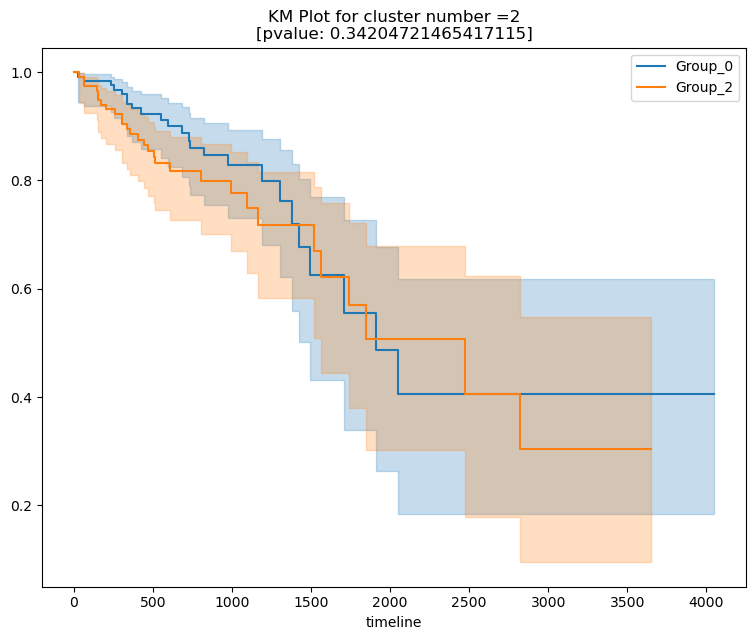

In [106]:
plt.figure(figsize=(20,7))
k=3
ax = plt.subplot(1, 2, k - 1)
for i in [0,2]:
    print(i)
    col_name = 'three_clusters'
    T =  df_merge_quartile[df_merge_quartile[col_name]==i]['time'].to_list()
    E =  df_merge_quartile[df_merge_quartile[col_name]==i]['status'].to_list()
    kmf.fit(T, E, label="Group_"+str(i))
    ax = kmf.plot_survival_function(ax=ax)
result = multivariate_logrank_test(df_merge_quartile['time'], df_merge_quartile[col_name], df_merge_quartile['status'])
# #print("##",result.test_statistic)
# print(k,result.p_value)
#print("IO",result.print_summary())
plt.title("KM Plot for cluster number ="+str(k-1)+"\n[pvalue: {}]".format(result.p_value))